# Não Linearidade em Redes Neurais com Pytorch / Non linearity in neural networks with Pytorch

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim

## Functions

In [2]:
def train(model, loss, optimizer, train_values, train_target, val_values, val_target, epochs=50):
    for e in range(1, epochs+1):
        optimizer.zero_grad()   
        output = model(train_values.float())
        loss_train = loss(output, train_target.float())
        
        val_output = model(val_values.float())
        loss_val = loss(val_output, val_target.float())
        
        loss_train.backward()
        optimizer.step()
        if e == 1 or e % 10 == 0:
            print(f'Epoch {e}: \ttrain loss {loss_train.item():.2f}\t validation loss {loss_val.item():.2f}')
    
def plot_decision_boundary(net):
    xx, yy = np.mgrid[-3:3:.01, -1.5:1.5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = net(torch.from_numpy(grid).float()).detach().numpy()[:, 0].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="Spectral", vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="Spectral", edgecolor="white", linewidth=1)
    ax.set(aspect="equal", xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), xlabel="$X_1$", ylabel="$X_2$");

## Loading data

In [3]:
n_samples = 1_000
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Shapes:\n(train)\tX shape = {X_train.shape}, y shape = {y_train.shape}\n(test)\tX shape = {X_val.shape}, y shape = {y_val.shape} ')

Shapes:
(train)	X shape = (750, 2), y shape = (750,)
(test)	X shape = (250, 2), y shape = (250,) 


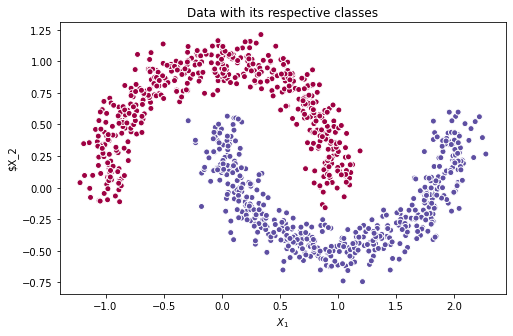

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='Spectral', edgecolors='white')
plt.title('Data with its respective classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2');

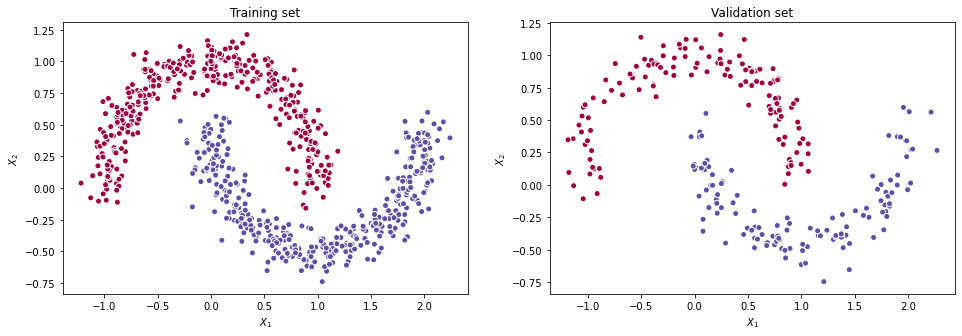

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='Spectral', edgecolors='white')
ax[0].set_title('Training set')
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$');
ax[1].scatter(X_val[:,0], X_val[:, 1], c=y_val, cmap='Spectral', edgecolors='white')
ax[1].set_title('Validation set');
ax[1].set_xlabel('$X_1$')
ax[1].set_ylabel('$X_2$');

In [6]:
input_shape = len(X_train[0])

### Converting numpy arrays to tensors

In [7]:
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train).unsqueeze(1)

X_val_tensor = torch.from_numpy(X_val)
y_val_tensor = torch.from_numpy(y_val).unsqueeze(1)

print(f'### SIZES ###\nX_train tensor size: {X_train_tensor.size()}')
print(f'y_train tensor size: {y_train_tensor.size()}')
print(f'X_val tensor size: {X_val_tensor.size()}')
print(f'y_val tensor size: {y_val_tensor.size()}\n')

### SIZES ###
X_train tensor size: torch.Size([750, 2])
y_train tensor size: torch.Size([750, 1])
X_val tensor size: torch.Size([250, 2])
y_val tensor size: torch.Size([250, 1])



## Simple Linear NN with 1 hidden layer

In [8]:
model = nn.Sequential(
    nn.Linear(input_shape, 100),
    nn.Linear(100, 1),
    nn.Sigmoid()
)
optimizer = optim.Adagrad(model.parameters())
loss = nn.BCELoss()
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
  (2): Sigmoid()
)

### Train NN

We're training with 150 epochs

In [9]:
train(model, loss, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=150)

Epoch 1: 	train loss 0.79	 validation loss 0.80
Epoch 10: 	train loss 0.41	 validation loss 0.41
Epoch 20: 	train loss 0.35	 validation loss 0.33
Epoch 30: 	train loss 0.32	 validation loss 0.30
Epoch 40: 	train loss 0.30	 validation loss 0.28
Epoch 50: 	train loss 0.29	 validation loss 0.27
Epoch 60: 	train loss 0.29	 validation loss 0.26
Epoch 70: 	train loss 0.28	 validation loss 0.25
Epoch 80: 	train loss 0.28	 validation loss 0.25
Epoch 90: 	train loss 0.27	 validation loss 0.24
Epoch 100: 	train loss 0.27	 validation loss 0.24
Epoch 110: 	train loss 0.27	 validation loss 0.24
Epoch 120: 	train loss 0.27	 validation loss 0.23
Epoch 130: 	train loss 0.27	 validation loss 0.23
Epoch 140: 	train loss 0.27	 validation loss 0.23
Epoch 150: 	train loss 0.27	 validation loss 0.23


### Predicting for validation

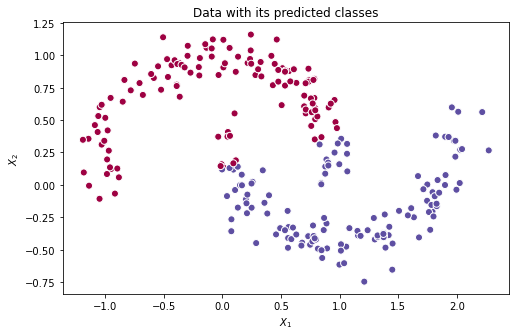

In [10]:
X_val_tensor = torch.from_numpy(X_val).float()
predict = model(X_val_tensor)
predict = torch.round(predict)
predict = predict.detach().numpy()
plt.figure(figsize=(8,5))
plt.scatter(X_val[:,0], X_val[:, 1], c=predict, cmap='Spectral', edgecolor="white", s=50)
plt.title('Data with its predicted classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');

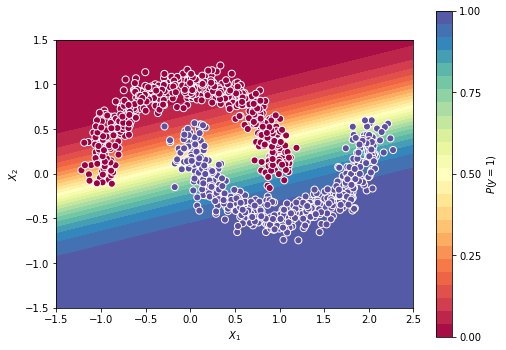

In [11]:
plot_decision_boundary(model)

## NN with 3 hidden layers, but all of them are linear

In [12]:
model = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.Linear(128, 64),
    nn.Linear(64, 32),
    nn.Linear(32, 1),
    nn.Sigmoid()
)
optimizer = optim.Adagrad(model.parameters())
loss = nn.BCELoss()
model

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): Linear(in_features=32, out_features=1, bias=True)
  (4): Sigmoid()
)

### Train NN

In [13]:
train(model, loss, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=150)

Epoch 1: 	train loss 0.66	 validation loss 0.66
Epoch 10: 	train loss 0.26	 validation loss 0.22
Epoch 20: 	train loss 0.26	 validation loss 0.22
Epoch 30: 	train loss 0.26	 validation loss 0.22
Epoch 40: 	train loss 0.26	 validation loss 0.22
Epoch 50: 	train loss 0.26	 validation loss 0.22
Epoch 60: 	train loss 0.26	 validation loss 0.22
Epoch 70: 	train loss 0.26	 validation loss 0.22
Epoch 80: 	train loss 0.26	 validation loss 0.22
Epoch 90: 	train loss 0.26	 validation loss 0.22
Epoch 100: 	train loss 0.26	 validation loss 0.22
Epoch 110: 	train loss 0.26	 validation loss 0.22
Epoch 120: 	train loss 0.26	 validation loss 0.22
Epoch 130: 	train loss 0.26	 validation loss 0.22
Epoch 140: 	train loss 0.26	 validation loss 0.22
Epoch 150: 	train loss 0.26	 validation loss 0.22


## Predicting for validation

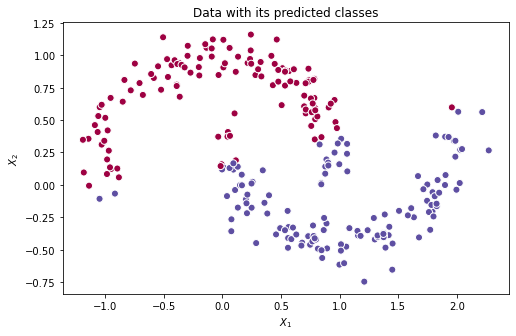

In [14]:
X_val_tensor = torch.from_numpy(X_val).float()
predict = model(X_val_tensor)
predict = torch.round(predict)
predict = predict.detach().numpy()
plt.figure(figsize=(8,5))
plt.scatter(X_val[:,0], X_val[:, 1], c=predict, cmap='Spectral', edgecolor="white", s=50)
plt.title('Data with its predicted classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');

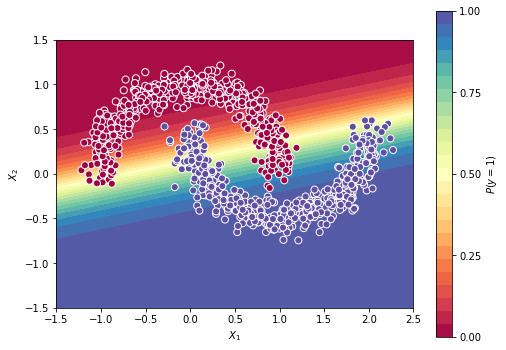

In [15]:
plot_decision_boundary(model)

## NN with Non linear activation functions

## Activation function between input and hidden layer 1

In [16]:
non_linear_model = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)
optimizer = optim.Adagrad(non_linear_model.parameters())
loss = nn.BCELoss()

non_linear_model

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)

### Train

In [17]:
train(non_linear_model, loss, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

Epoch 1: 	train loss 0.70	 validation loss 0.71
Epoch 10: 	train loss 0.44	 validation loss 0.43
Epoch 20: 	train loss 0.36	 validation loss 0.35
Epoch 30: 	train loss 0.33	 validation loss 0.31
Epoch 40: 	train loss 0.30	 validation loss 0.29
Epoch 50: 	train loss 0.29	 validation loss 0.27


### Plotting decision boundary

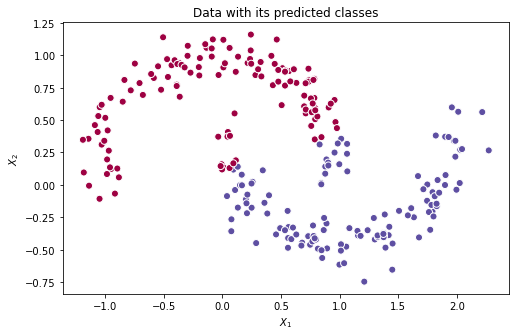

In [18]:
X_val_tensor = torch.from_numpy(X_val).float()
predict = non_linear_model(X_val_tensor)
predict = torch.round(predict)
predict = predict.detach().numpy()
plt.figure(figsize=(8,5))
plt.scatter(X_val[:,0], X_val[:, 1], c=predict, cmap='Spectral', edgecolor="white", s=50)
plt.title('Data with its predicted classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');

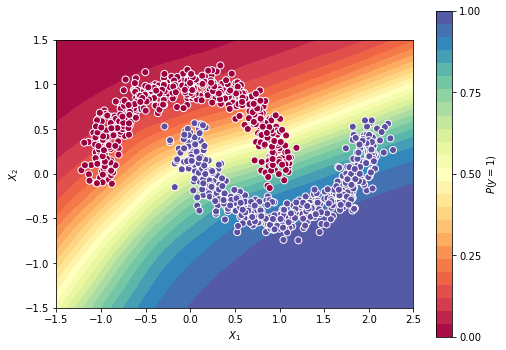

In [19]:
plot_decision_boundary(non_linear_model)

## 2 hidden layers, ReLU: input -> first hidden layer + ReLU: first -> second input layer 

In [20]:
non_linear_model = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)
optimizer = optim.Adagrad(non_linear_model.parameters())
loss = nn.BCELoss()

non_linear_model

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
  (5): Sigmoid()
)

### Train

In [21]:
train(non_linear_model, loss, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

Epoch 1: 	train loss 0.72	 validation loss 0.71
Epoch 10: 	train loss 0.29	 validation loss 0.27
Epoch 20: 	train loss 0.21	 validation loss 0.18
Epoch 30: 	train loss 0.16	 validation loss 0.13
Epoch 40: 	train loss 0.12	 validation loss 0.10
Epoch 50: 	train loss 0.10	 validation loss 0.08


### Plotting decision boundary

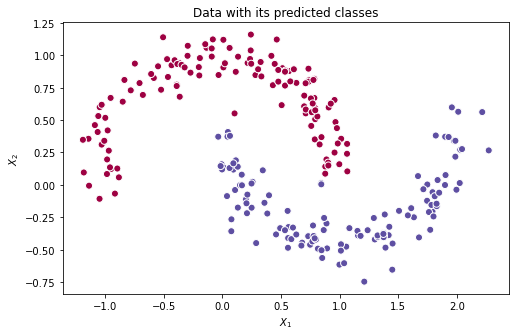

In [22]:
X_val_tensor = torch.from_numpy(X_val).float()
predict = non_linear_model(X_val_tensor)
predict = torch.round(predict)
predict = predict.detach().numpy()
plt.figure(figsize=(8,5))
plt.scatter(X_val[:,0], X_val[:, 1], c=predict, cmap='Spectral', edgecolor="white", s=50)
plt.title('Data with its predicted classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');

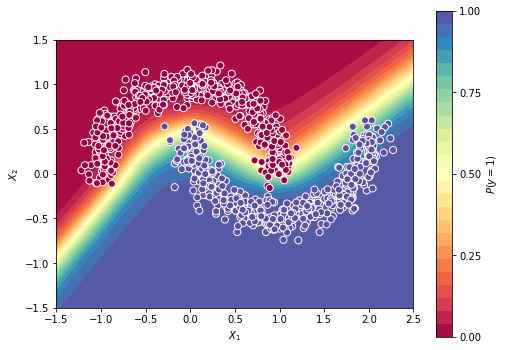

In [23]:
plot_decision_boundary(non_linear_model)

## 3 hidden layers, ReLU: input -> first hidden layer + ReLU: first -> second input layer + ReLU: second -> third input layer

In [24]:
non_linear_model = nn.Sequential(
    nn.Linear(input_shape, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)
optimizer = optim.Adagrad(non_linear_model.parameters())
loss = nn.BCELoss()

non_linear_model

Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
  (7): Sigmoid()
)

### Train

In [25]:
train(non_linear_model, loss, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

Epoch 1: 	train loss 0.70	 validation loss 0.70
Epoch 10: 	train loss 0.21	 validation loss 0.18
Epoch 20: 	train loss 0.11	 validation loss 0.08
Epoch 30: 	train loss 0.05	 validation loss 0.04
Epoch 40: 	train loss 0.03	 validation loss 0.02
Epoch 50: 	train loss 0.02	 validation loss 0.01


### Plotting decision boundary

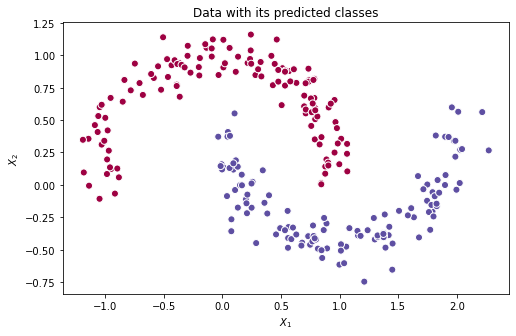

In [26]:
X_val_tensor = torch.from_numpy(X_val).float()
predict = non_linear_model(X_val_tensor)
predict = torch.round(predict)
predict = predict.detach().numpy()
plt.figure(figsize=(8,5))
plt.scatter(X_val[:,0], X_val[:, 1], c=predict, cmap='Spectral', edgecolor="white", s=50)
plt.title('Data with its predicted classes')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');

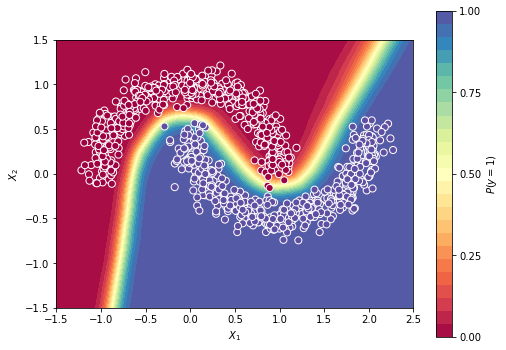

In [27]:
plot_decision_boundary(non_linear_model)

## References
- [Deep Learning with Pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
- [Why nonlinear activation functions improve ML performance](https://www.machinecurve.com/index.php/2020/10/29/why-nonlinear-activation-functions-improve-ml-performance-with-tensorflow-example/)
- [Plotting decision boundary of logistic regression](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression?noredirect=1&lq=1)